### 1. 산점도 그래프

   (1) matplotlib의 subplots()로 기본 틀 만들고 seaborn의 regplot()그래프 함수 이용
    
    회귀선 제거 : fit_reg=False
     axes = sb.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
     
     [예] 지불 금액과 팁에 대한 그래프
     
     
   (2) 산점도와 히스토그램을 한번에 - jointplot()
  
      ` 산점도 그래프의 데이타를 육각(hexbin)으로 구분 : kind='hex'속성
          ( 개수가 많아지면 진한 색으로 표시 )
          axes = sb.jointplot(x='total_bill', y='tip', data=tips, kind='hex')



###  2. 이차원 밀집도 그래프 (등고선그래프) - kdeplot()


###  3. 막대그래프 - barplot()
 
     * 이산형 데이타(명목데이타)
     
     [예] 시간에 따란 비불한 비용의 평균 그래프
     

###  4. 박스그래프 - boxplot() 
     : 최소값, 4분위수, 평균값, 이상치 등의 통계량을 한번에 표현하는 그래프
     
     - 1분위수와 3분위수를 박스로 그려짐
     - 박스 내부의 선은 중앙값이다 (평균값이 아님)
     - 박수 외부의 선은 최솟값과 최댓값인데
         ` 최솟값 : 1분위수 - ( IQR * 1.5 )
         ` 최댓값 : 3분위수 + ( IQR * 1.5 )
         ` IQR = 3분위수 - 1분위수
     - 선 밖의 점은 outlier로 결측치이다
     
     
###  5. 바이올린 그래프 - violinplot()
     : 박스 그래스는 통계 수치를 확인하기 위해 자주 사용되지만 데이터 분산이 모호하기에 
       박스 그래스에 커널 밀도를 표현한 그래프     
       
       
###  6. 관계 그래프 - pairplot()
 
    [그래프 분석]
    1. 데이타셋에서 연속형 데이타로 된 컬럼
    2. 동일 컬럼인경우 즉 하나의 변수이기에 히스토그램으로 나옴
    3. 다른 변수와의 결합은 이차원 그래프로 산점도 그래프로 나옴
    4. 대각선으로는 동일한 결과        

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')

Text(0, 0.5, 'Tip')

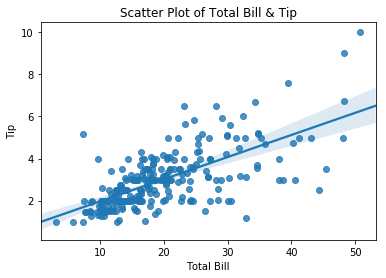

In [2]:
"""
1. 산점도 그래프

   (1) matplotlib의 subplots()로 기본 틀 만들고 seaborn의 그래프 함수 이용
    
    회귀선 제거 : fit_reg=False
     axes = sb.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
     
     [예] 지불 금액과 팁에 대한 그래프
""" 
plt.subplot()
axes = sns.regplot(x='total_bill', y='tip', data=tips)
axes.set_title('Scatter Plot of Total Bill & Tip')
axes.set_xlabel('Total Bill')
axes.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot')

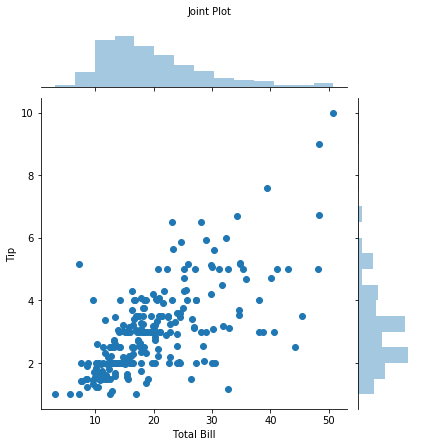

In [3]:
""" 
   (2) 산점도와 히스토그램을 한번에 - jointplot()
  
      ` 산점도 그래프의 데이타를 육각(hexbin)으로 구분 : kind='hex'속성
          ( 개수가 많아지면 진한 색으로 표시 )
          axes = sb.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
  
"""
axes = sns.jointplot(x='total_bill', y='tip', data=tips)
axes.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
axes.fig.suptitle('Joint Plot', fontsize=10, y=1.03)

Text(0, 0.5, 'Tip')

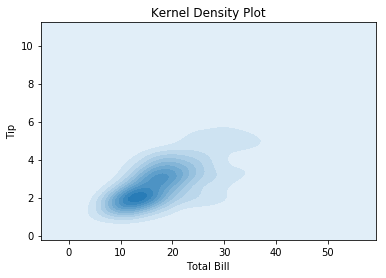

In [4]:
"""
 2. 이차원 밀집도 그래프 (등고선그래프) - kdeplot()

    [참고] 함수의 도움말 : 함수에 커서 놓고 ctrl + tab
"""
plt.subplot()
axes = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
axes.set_title('Kernel Density Plot')
axes.set_xlabel('Total Bill')
axes.set_ylabel('Tip')

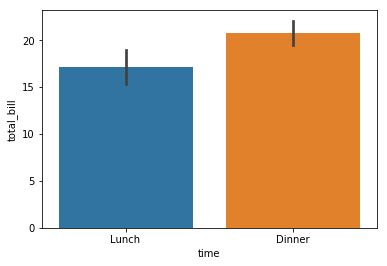

In [16]:
"""
 3. 막대그래프 - barplot()
 
     * 이산형 데이타(명목데이타)
     
     [예] 시간대에 따라 지불한 비용의 평균 그래프
     
     *** barplot() : x와 y 둘 다 지정
     *** countplot() : x와 y중 하나만 지정
"""
plt.subplot()
axes = sns.barplot(x='time', y='total_bill', data=tips)
# axes.set_title('Bar plot of average total bill for time of day')
# axes.set_xlabel('Time of Day')
# axes.set_ylabel('Average total bill')

# axes = sns.countplot(y='time', c='total_bill', data=tips) -> 에러발생

Text(0, 0.5, 'Average total bill')

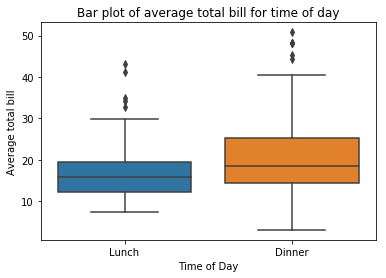

In [6]:
"""

이 부분은 설명해야하나?

 4. 박스그래프 - boxplot() 
     : 최소값, 4분위수, 평균값, 이상치 등의 통계량을 한번에 표현하는 그래프
     
     - 1분위수와 3분위수를 박스로 그려짐
     - 박스 내부의 선은 중앙값이다 (평균값이 아님)
     - 박수 외부의 선은 최솟값과 최댓값인데
         ` 최솟값 : 1분위수 - ( IQR * 1.5 )
         ` 최댓값 : 3분위수 + ( IQR * 1.5 )
         ` IQR = 3분위수 - 1분위수
     - 선 밖의 점은 outlier로 결측치이다
"""
axes = plt.subplot()
axes = sns.boxplot(x='time', y='total_bill', data=tips)
axes.set_title('Bar plot of average total bill for time of day')
axes.set_xlabel('Time of Day')
axes.set_ylabel('Average total bill')

# [연습] 요일에 따른 전체 금액을 표시한다면?
# sb.boxplot(x='day', y='total_bill', data=tips)

# [연습] 요일에 따른 전체금액을 흡연에 따라 표시한다면?
# sb.boxplot(x='day', y='total_bill', hue='smoker' data=tips, platette='Set3')

<img src="https://i.imgur.com/CnFsXL9.png" width=450>

Text(0, 0.5, 'Average total bill')

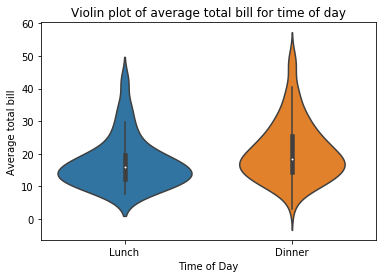

In [15]:
"""
 5. 바이올린 그래프 - violinplot()
     : 박스 그래스는 통계 수치를 확인하기 위해 자주 사용되지만 데이터 분산이 모호하기에 
       박스 그래스에 커널 밀도를 표현한 그래프
       
       [읽기] 점심에는 주로 15달러 금액이 주를 이루고
           저녁에도 15달러 정도이지만 더 높은 금액이 지불되기도 한다?
"""
axes = plt.subplot()
axes = sns.violinplot(x='time', y='total_bill', data=tips)
axes.set_title('Violin plot of average total bill for time of day')
axes.set_xlabel('Time of Day')
axes.set_ylabel('Average total bill')

# [연습] 요일에 따른 지불 금액을 출력

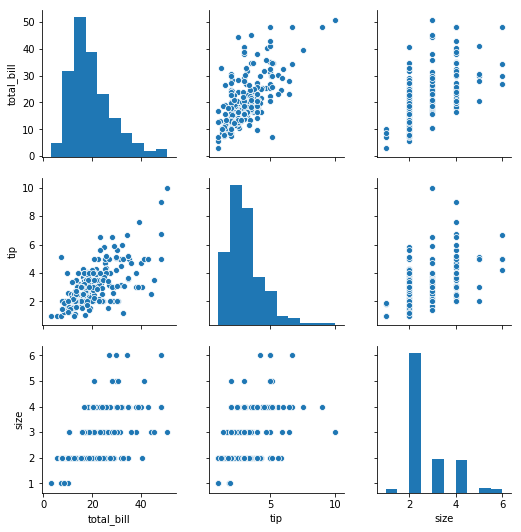

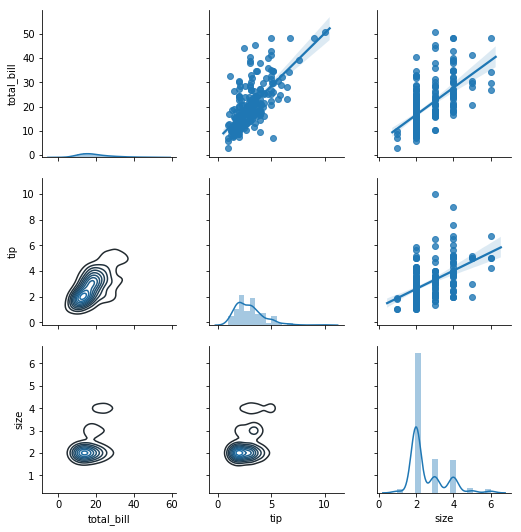

In [8]:
"""
 6. 관계 그래프 - pairplot()
 
    [그래프 분석]
    1. 데이타셋에서 연속형 데이타로 된 컬럼
    2. 동일 컬럼인경우 즉 하나의 변수이기에 히스토그램으로 나옴
    3. 다른 변수와의 결합은 이차원 그래프로 산점도 그래프로 나옴
    4. 대각선으로는 동일한 결과    
"""
pair = sns.pairplot(tips)

# 대각선을 기준으로 위 아래를 다른 그래프로 지정
pair_grid =  sns.PairGrid(tips)
pair_grid =  pair_grid.map_upper(sns.regplot) # 대각선 위는 산점도 그래프
pair_grid =  pair_grid.map_lower(sns.kdeplot) # 대각선 아래는 이차원 밀집도 그래프
pair_grid =  pair_grid.map_diag(sns.distplot) # 대각선은 히스토그램
plt.show()